## Get Data

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/regression/data/Fish.csv')

In [3]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


## Explore data

In [6]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [11]:
df['Weight'].max()

1650.0

In [12]:
df['Weight'].min()

0.0

In [13]:
df['Length1'].min()

7.5

In [14]:
df['Length2'].min()

8.4

In [15]:
df['Length3'].min()

8.8

In [16]:
df['Height'].min()

1.7284

In [17]:
df['Width'].min()

1.0476

In [24]:
import matplotlib.pyplot  as plt 
import seaborn as sns

<Axes: xlabel='Height', ylabel='Width'>

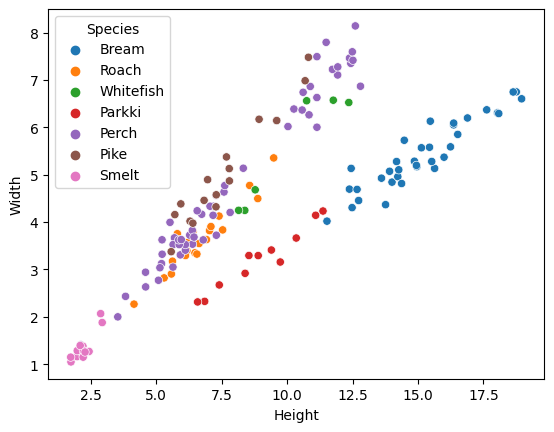

In [22]:
plt.figure()
sns.scatterplot(x='Height',y='Width', hue='Species',data=df)

<Axes: xlabel='Weight', ylabel='Length1'>

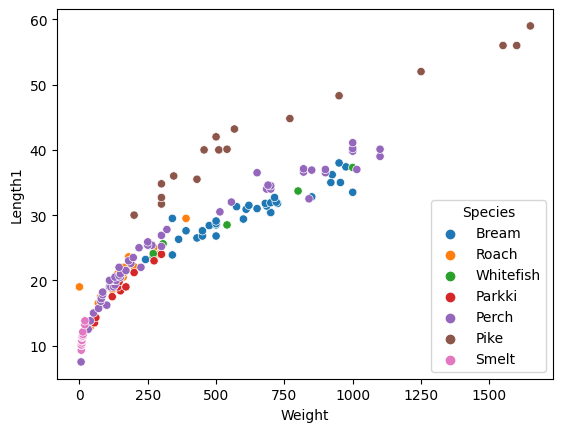

In [23]:
plt.figure()
sns.scatterplot(x='Weight',y='Length1',hue='Species',data=df)

In [67]:
df.query('Weight == 0.0')

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [68]:
df_clean = df.drop([40,1])

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  157 non-null    object 
 1   Weight   157 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  157 non-null    float64
 5   Height   157 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [70]:
df_clean['Weight'].min()

5.9

## Task 1
Linear regression and random forest model with randomly split dataset into 70/30 training and test data

In [72]:
# split data and drop non-numerical column
X = df_clean.drop(['Species','Weight'], axis=1)
y = df_clean['Weight']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=7)

In [74]:
x_train

,Length1,Length2,Length3,Height,Width
84,19.0,21.0,22.5,5.6925,3.6675
140,48.3,51.7,55.1,8.9262,6.1712
132,35.5,38.0,40.5,7.2900,4.5765
9,28.5,30.7,36.2,14.2266,4.9594
133,36.0,38.5,41.0,6.3960,3.9770
...,...,...,...,...,...
94,21.0,23.0,24.5,5.2185,3.6260
105,25.4,27.5,28.9,7.2828,4.5662
153,11.4,12.0,13.2,2.2044,1.1484
69,21.2,23.0,25.8,10.3458,3.6636


In [75]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (48, 5)
Train Data =  (109, 5)
Target Train =  (109,)
Target Test =  (48,)


In [76]:
y_train

84     125.0
140    950.0
132    430.0
9      500.0
133    345.0
       ...  
94     150.0
105    250.0
153      9.8
69     200.0
26     720.0
Name: Weight, Length: 109, dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler 
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
X_test = std_scale.transform(x_test)

In [78]:
X_train

array([[-7.43772314e-01, -7.11752442e-01, -7.72029583e-01,
        -7.85867044e-01, -4.60305737e-01],
       [ 2.16438836e+00,  2.13041605e+00,  2.00940601e+00,
        -2.87991126e-02,  1.08621339e+00],
       [ 8.93929090e-01,  8.62086789e-01,  7.63732398e-01,
        -4.11863265e-01,  1.01177623e-01],
       [ 1.99146676e-01,  1.86261707e-01,  3.96855925e-01,
         1.21212084e+00,  3.37692451e-01],
       [ 9.43556405e-01,  9.08376178e-01,  8.06392453e-01,
        -6.21164910e-01, -2.69129609e-01],
       [-1.88520056e+00, -1.87824505e+00, -1.94091509e+00,
        -1.62412716e+00, -1.85598412e+00],
       [ 2.53163049e+00,  2.52850480e+00,  2.40187851e+00,
         3.83272281e-01,  1.58883056e+00],
       [-9.62132501e-01, -9.24683632e-01, -1.03652192e+00,
        -9.01357538e-01, -7.96392751e-01],
       [ 8.44301774e-01,  9.08376178e-01,  1.07088479e+00,
         2.10418131e+00,  1.16966378e+00],
       [ 6.37415058e-04,  2.88777841e-02,  2.09151683e-01,
         7.94781792e-01

In [79]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [80]:
pred = LR.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [82]:
print('LineRegression r2_score :', r2_score(y_test, pred))

LineRegression r2_score : 0.8997102569089782


In [83]:
print('LineRegression root mean squared error:', mean_squared_error(y_test, pred, squared=False))

LineRegression root mean squared error: 115.29615064268458


In [84]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred2 = model.predict(X_test)
print('r2_score :', r2_score(y_test, pred2))
print('root mean squared error:', mean_squared_error(y_test, pred2, squared=False))

r2_score : 0.9632245085016097
root mean squared error: 69.8177407625562


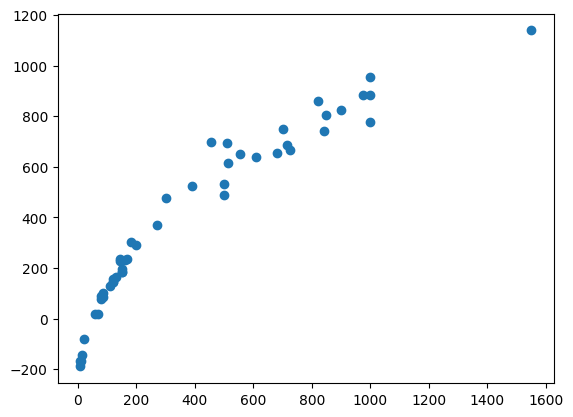

In [85]:
plt.scatter(y_test, pred)

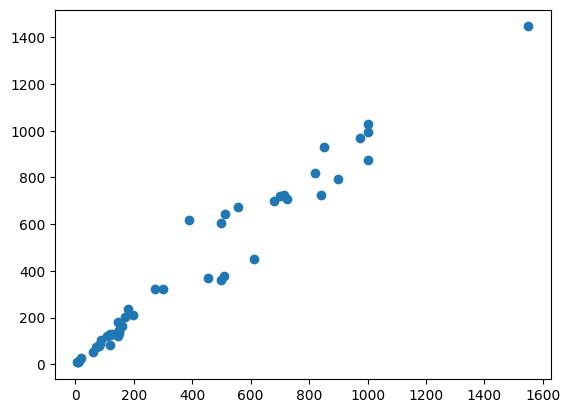

In [86]:
plt.scatter(y_test, pred2)

## Task 2
Linear regression and random forest model with dataset randomly split 70/30, but for every species

In [87]:
# split data, but keep species column
X = df_clean.drop(['Weight'], axis=1)
y = df_clean['Weight']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=7, stratify=X.Species)

In [89]:
x_test['Species'].value_counts()

Species
Perch        17
Bream        11
Roach         6
Pike          5
Smelt         4
Parkki        3
Whitefish     2
Name: count, dtype: int64

In [90]:
x_train['Species'].value_counts()

Species
Perch        39
Bream        23
Roach        13
Pike         12
Smelt        10
Parkki        8
Whitefish     4
Name: count, dtype: int64

In [91]:
x_train.drop(columns=['Species'], inplace=True)
x_test.drop(columns=['Species'], inplace=True)
x_train.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [92]:
std_scale = StandardScaler()
X_train = std_scale.fit_transform(x_train)
X_test = std_scale.transform(x_test)

In [93]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [94]:
pred = LR.predict(X_test)
print('LineRegression r2_score :', r2_score(y_test, pred))
print('LineRegression root mean squared error:', mean_squared_error(y_test, pred, squared=False))

LineRegression r2_score : 0.8828715415801147
LineRegression root mean squared error: 127.84663683761646


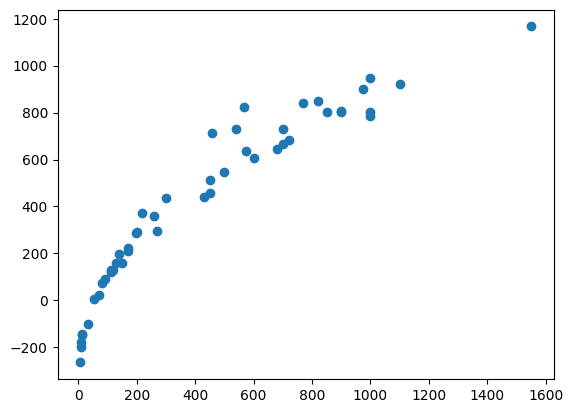

In [95]:
# plot linear regression
plt.scatter(y_test, pred)

In [96]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
pred2 = model.predict(X_test)
print('r2_score :', r2_score(y_test, pred2))
print('root mean squared error:', mean_squared_error(y_test, pred2, squared=False))

r2_score : 0.9840494849769986
root mean squared error: 47.178643466880224


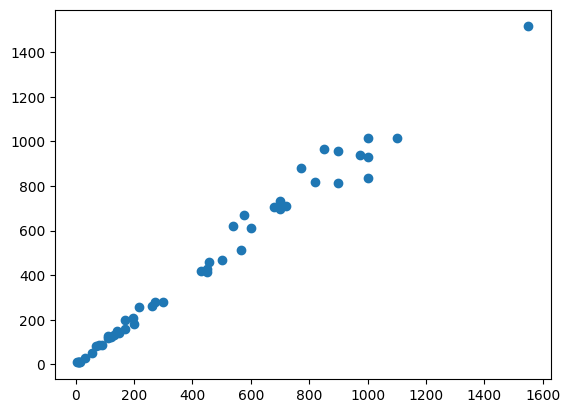

In [97]:
# plot random forest model
plt.scatter(y_test, pred2)

**Conclusion:** Splitting the dataset stratified by species yields a better fit, higher R2 score and lower RMSE with random forest model, but slightly lower R2 score and higher RMSE with linear regression.